In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
filepath='/kaggle/input/titanic/'

# Exploratory Data Analysis

In [3]:
traindf = pd.read_csv(filepath+'train.csv')
testdf = pd.read_csv(filepath+'test.csv')
genderdf = pd.read_csv(filepath+'gender_submission.csv')

In [4]:
traindf.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
testdf.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [6]:
genderdf.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


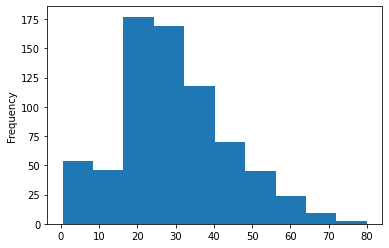

In [7]:
traindf.Age.plot.hist();

In [8]:
## Missing values

traindf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

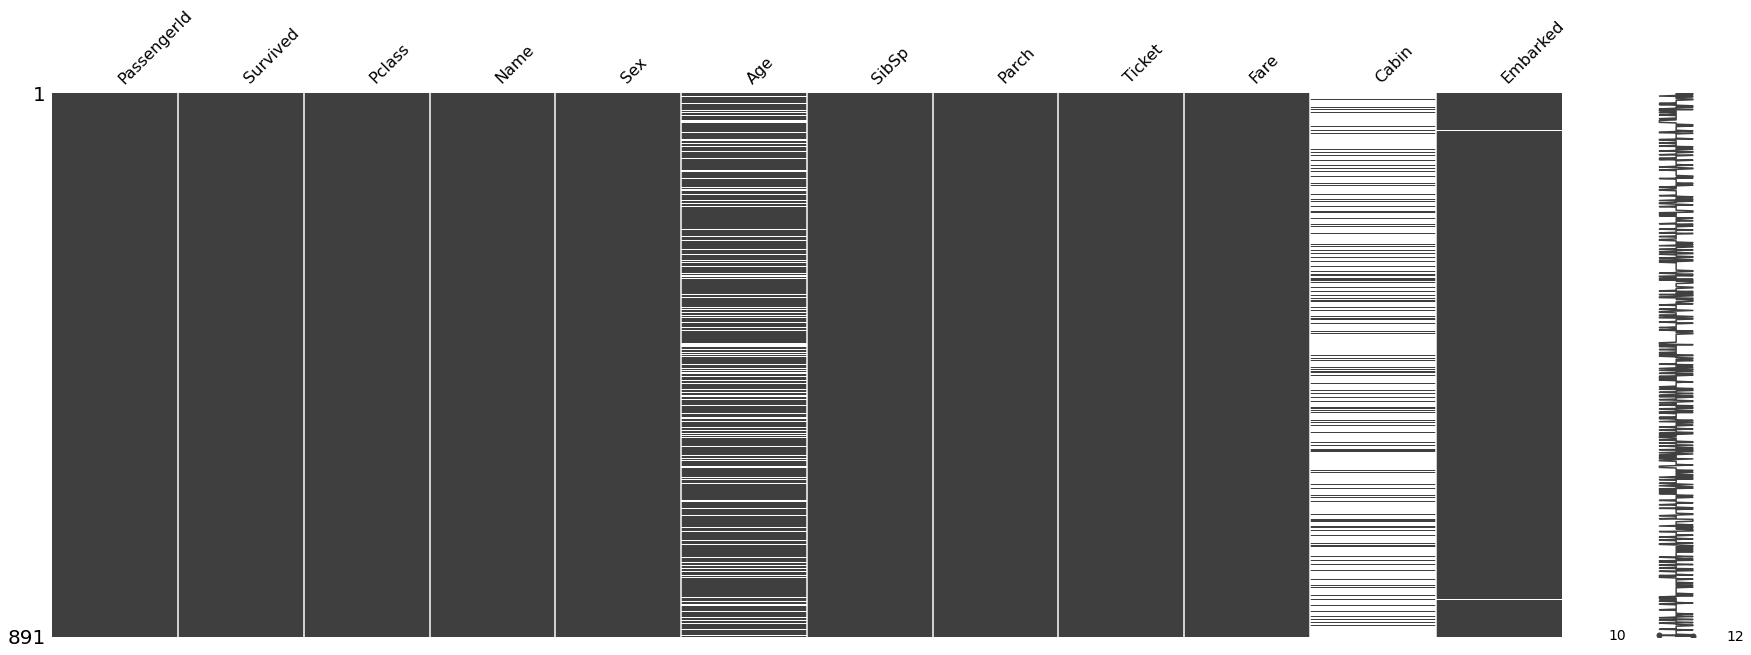

In [9]:
import missingno
missingno.matrix(traindf, figsize=(30,10));

In [10]:
dfbin = pd.DataFrame()
dfcon = pd.DataFrame()

In [11]:
traindf.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

0    549
1    342
Name: Survived, dtype: int64


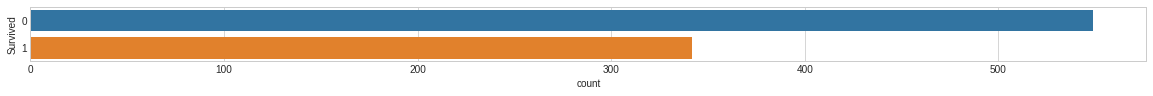

In [12]:
## Target feature 'Survived' :  1 :Survived  ,  0:Not Survived

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=traindf)
print(traindf.Survived.value_counts())

In [13]:
dfbin['Survived']=traindf['Survived']
dfcon['Survived']=traindf['Survived']

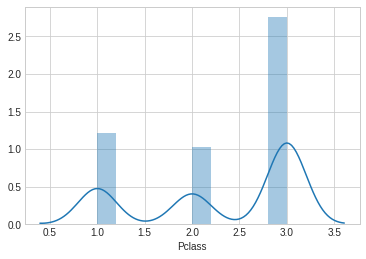

In [14]:
## Feature Pclass : ticket class of passenger
## 1 : 1st class ,  2: 2nd class, 3 : 3rd class

sns.distplot(traindf.Pclass);

In [15]:
dfbin['Pclass']=traindf['Pclass']
dfcon['Pclass']=traindf['Pclass']

male      577
female    314
Name: Sex, dtype: int64


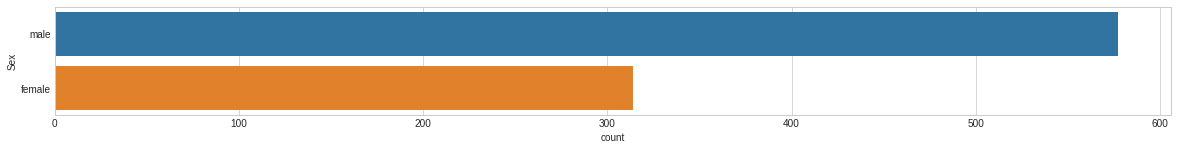

In [16]:
## Feature Sex : male or female

fig=plt.figure(figsize=(20,2))
sns.countplot(y='Sex', data=traindf);
print(traindf.Sex.value_counts())

In [17]:
dfbin['Sex'] = traindf['Sex']
dfbin['Sex'] = np.where(dfbin['Sex']=='female',1, 0)
dfcon['Sex'] = traindf['Sex']

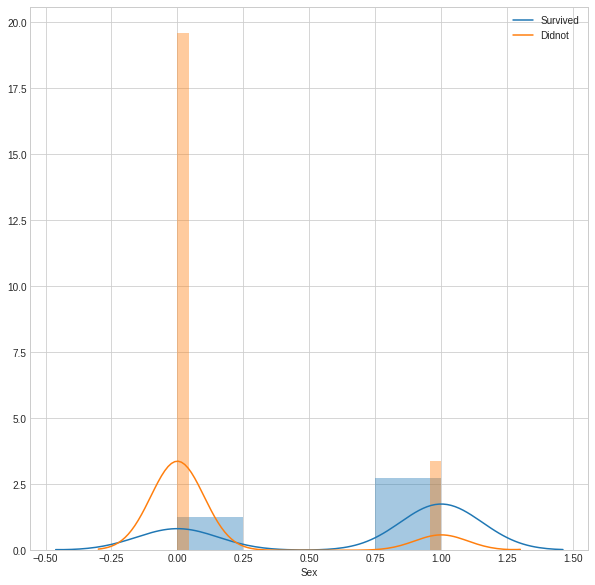

In [18]:
## Sex-Survival plot

fig = plt.figure(figsize=(10,10))
sns.distplot(dfbin.loc[dfbin['Survived']==1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(dfbin.loc[dfbin['Survived']==0]['Sex'], kde_kws={'label': 'Didnot' , 'bw':0.1});

In [19]:
## Feature Age
traindf.Age.isnull().sum()

177

In [20]:
def plot_count_dist(data, bindf, labelcol, targetcol, figsize=(20,5), usebindf=False):
    if usebindf:
        fig=plt.figure(figsize=figsize)
        plt.subplot(1,2,1)
        sns.countplot(y=targetcol, data=bindf);
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[labelcol]==1][targetcol], kde_kws={'Label': 'Survived', 'bw':0.1});
        sns.distplot(data.loc[data[labelcol]==0][targetcol], kde_kws={'Label': 'Did not Survive', 'bw':0.1});
    else:
        fig=plt.figure(figsize=figsize)
        plt.subplot(1,2,1)
        sns.countplot(y=targetcol, data=data);
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[labelcol]==1][targetcol], kde_kws={'Label': 'Survived', 'bw':0.1});
        sns.distplot(data.loc[data[labelcol]==0][targetcol], kde_kws={'Label': 'Did not Survive', 'bw':0.1});

In [21]:
## feature SibSp
dfbin['SibSp']=traindf['SibSp']
dfcon['SibSp']=traindf['SibSp']


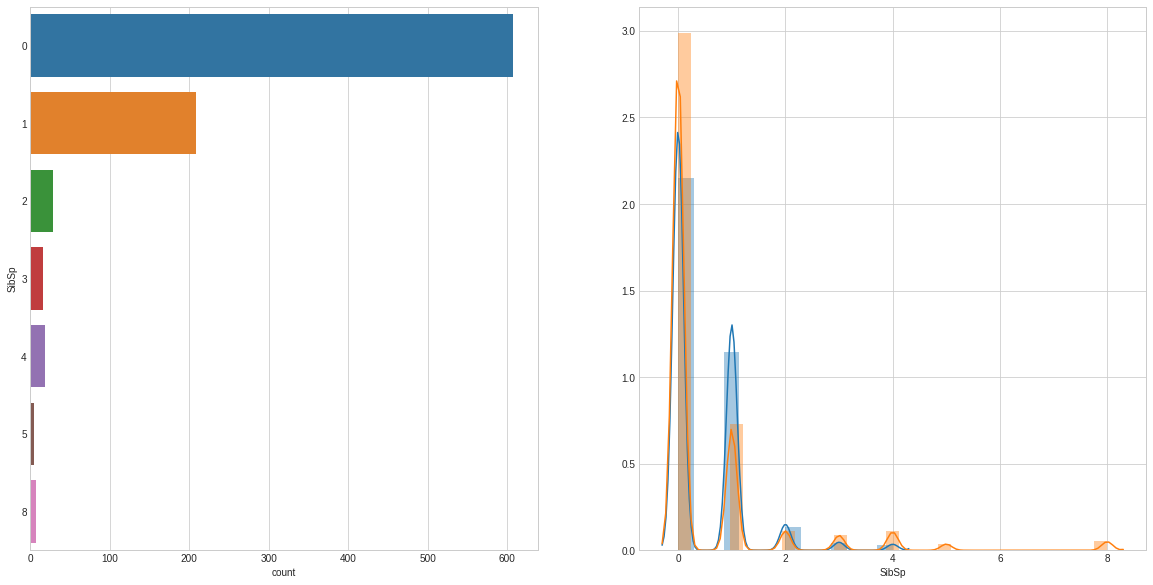

In [22]:
plot_count_dist(traindf, bindf=dfbin, labelcol='Survived', targetcol='SibSp', figsize=(20,10))

In [23]:
# Feature : Parch
dfbin['Parch']=traindf['Parch']
dfcon['Parch']=traindf['Parch']

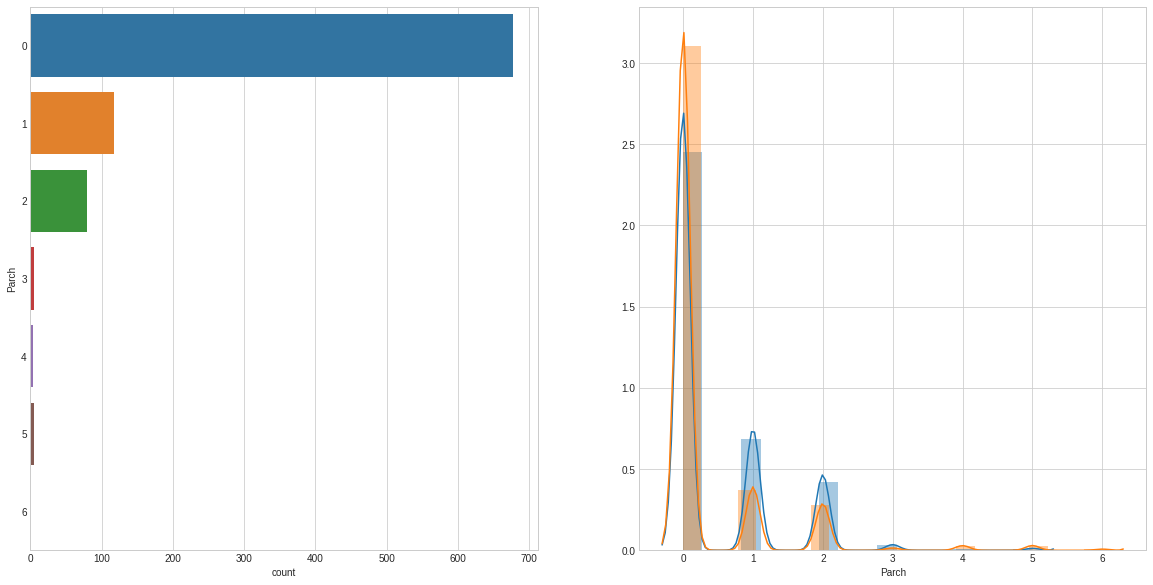

In [24]:
plot_count_dist(traindf, bindf=dfbin, labelcol='Survived', targetcol='Parch', figsize=(20,10))

In [25]:
# Feature : Fare
len(traindf.Fare.unique())

248

In [26]:
dfcon['Fare']=traindf['Fare']
dfbin['Fare']=pd.cut(traindf['Fare'], bins=5) ## discretized

In [27]:
dfbin['Fare'].head()

0    (-0.512, 102.466]
1    (-0.512, 102.466]
2    (-0.512, 102.466]
3    (-0.512, 102.466]
4    (-0.512, 102.466]
Name: Fare, dtype: category
Categories (5, interval[float64]): [(-0.512, 102.466] < (102.466, 204.932] < (204.932, 307.398] < (307.398, 409.863] < (409.863, 512.329]]

In [28]:
dfbin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

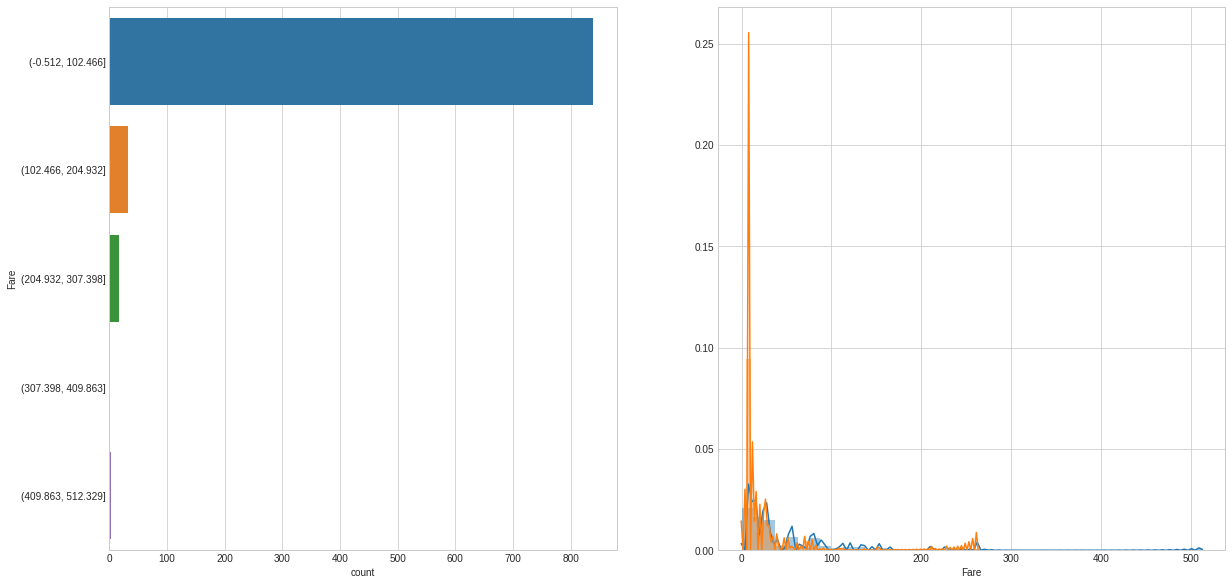

In [29]:
plot_count_dist(data=traindf, bindf=dfbin, labelcol='Survived', targetcol='Fare', figsize=(20,10), usebindf=True)

In [30]:
# feature : Embarked
traindf.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

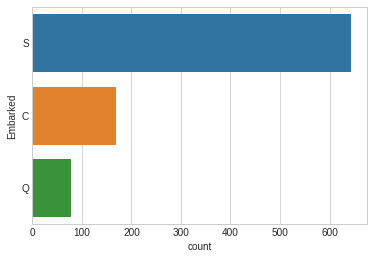

In [31]:
sns.countplot(y='Embarked', data=traindf);

In [32]:
dfbin['Embarked']=traindf['Embarked']
dfcon['Embarked']=traindf['Embarked']


In [33]:
## drop rows with missing values for Embarked
dfcon=dfcon.dropna(subset=['Embarked'])
dfbin=dfbin.dropna(subset=['Embarked'])

In [34]:
len(dfcon)

889

In [35]:
dfbin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [36]:
## one-hot encode binned variables
onehotcols = dfbin.columns.tolist()
onehotcols.remove('Survived')
dfbinenc = pd.get_dummies(dfbin, columns=onehotcols)

In [37]:
dfbinenc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [38]:
## one hot encode the categorical columns

dfembarkedonehot = pd.get_dummies(dfcon['Embarked'], prefix='embarked')
dfsexonehot = pd.get_dummies(dfcon['Sex'], prefix='sex')
dfpclassonehot = pd.get_dummies(dfcon['Pclass'], prefix='pclass')

In [39]:
dfconenc = pd.concat([dfcon, dfembarkedonehot, dfsexonehot, dfpclassonehot], axis=1)

In [40]:
dfconenc = dfconenc.drop(['Embarked', 'Sex', 'Pclass'], axis=1)

In [41]:
dfconenc.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


## Machine Learning Models

In [42]:
dfselected = dfconenc

In [43]:
dfselected.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [44]:
xtrain = dfselected.drop('Survived', axis=1)
ytrain = dfselected.Survived

In [48]:
print(xtrain.shape)
xtrain.head()

(889, 11)


,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [89]:
## import libraries

from sklearn import model_selection, metrics
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier, Pool , cv

import datetime
import time

import warnings
warnings.filterwarnings('ignore')

In [65]:
def fit_ml_algo(algo, xtrain, ytrain, cv):
    
    #one pass
    model = algo.fit(xtrain, ytrain)
    acc = round(model.score(xtrain, ytrain)*100, 2)
    
    # cross-validation
    trainpred = model_selection.cross_val_predict(algo, xtrain, ytrain, cv=cv, n_jobs=-1)
    acc_cv = round(metrics.accuracy_score(ytrain, trainpred)*100 , 2)
    
    return trainpred, acc, acc_cv

## Logistic Regression

In [70]:
## Logistic Regression

start_time = time.time()

trainpred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), xtrain, ytrain, 10)

log_time=time.time() - start_time

print(f"Accuracy : {acc_log}")
print(f"Accuracy with 10-fold CV : {acc_cv_log}")
print(f"Running Time : {datetime.timedelta(seconds=log_time)}")

Accuracy : 79.98
Accuracy with 10-fold CV : 79.42
Running Time : 0:00:00.265709


## K-Nearest Neighbors

In [74]:
## KNN
start_time = time.time()
trainpred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), xtrain, ytrain, 10)
knn_time = time.time() - start_time
print(f"Accuracy : {acc_knn}")
print(f"Accuracy with 10-Fold CV : {acc_cv_knn}")
print(f"Running time : {datetime.timedelta(seconds=knn_time)}")

Accuracy : 83.46
Accuracy with 10-Fold CV : 76.72
Running time : 0:00:00.267586


## Gaussian Naive Bayes

In [77]:
## Gaussian Naive Bayes
start_time = time.time()
trainpred_gs, acc_gs, acc_cv_gs = fit_ml_algo(GaussianNB(), xtrain, ytrain, 10)
gstime = time.time() - start_time
print(f"Accuracy : {acc_gs}")
print(f"Accuracy with 10-Fold CV : {acc_cv_gs}")
print(f"Running time : {datetime.timedelta(seconds=gstime)}")

Accuracy : 78.52
Accuracy with 10-Fold CV : 77.95
Running time : 0:00:01.450446


## Linear Support Vector Machines

In [82]:
## Linear SVC

start_time = time.time()
trainpred_svc, acc_svc, acc_cv_svc = fit_ml_algo(LinearSVC(), xtrain, ytrain, 10)
linsvctime = time.time() - start_time
print(f"Accuracy : {acc_svc}")
print(f"Accuracy with 10-Fold CV : {acc_cv_svc}")
print(f"Running time :  {datetime.timedelta(seconds=linsvctime)}")

Accuracy : 74.92
Accuracy with 10-Fold CV : 78.29
Running time :  0:00:00.306960


## Stochastic Gradient Descent

In [84]:
## SGD

start_time = time.time()
trainpred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), xtrain, ytrain, 10)
sgdtime = time.time() - start_time
print(f"Accuracy : {acc_sgd}")
print(f"Accuracy with 10-Fold CV : {acc_cv_sgd}")
print(f"Running Time : {datetime.timedelta(sgdtime)}")

Accuracy : 72.89
Accuracy with 10-Fold CV : 73.23
Running Time : 1:49:47.656403


## Decision Tree Classifier

In [86]:
## Decision Tree CLassifier

start_time = time.time()
trainpred_dt , acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), xtrain, ytrain, 10)
dttime = time.time() - start_time
print(f"Accuracy : {acc_dt}")
print(f"Accuracy with 10-Fold CV : {acc_cv_dt}")
print(f"Running time : {datetime.timedelta(seconds=dttime)}")

Accuracy : 92.46
Accuracy with 10-Fold CV : 80.09
Running time : 0:00:01.458925


## Gradient Boost Trees

In [88]:
## Gradient Boost Classifier

start_time = time.time()
trainpred_gbt , acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), xtrain, ytrain, 10)
gbttime = time.time() - start_time
print(f"Accuracy : {acc_gbt}")
print(f"Accuracy with 10-Fold CV : {acc_cv_gbt}")
print(f"Running Time : {datetime.timedelta(seconds=gbttime)}")

Accuracy : 86.61
Accuracy with 10-Fold CV : 80.65
Running Time : 0:00:00.711919


## Catboost Algorithm

In [92]:
## Define categorical features for catboost model

cat_features = np.where(xtrain.dtypes != np.float)[0]
cat_features

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10])

In [93]:
train_pool = Pool(xtrain, ytrain, cat_features)

In [94]:
## catboost model
catboostmodel = CatBoostClassifier(iterations=1000, custom_loss=['Accuracy'], loss_function='Logloss')

catboostmodel.fit(train_pool, plot=True)

acc_catboost = round(catboostmodel.score(xtrain, ytrain)*100 , 2)

Learning rate set to 0.009797


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6862830	total: 64.5ms	remaining: 1m 4s
1:	learn: 0.6809444	total: 66.5ms	remaining: 33.2s
2:	learn: 0.6751692	total: 69ms	remaining: 22.9s
3:	learn: 0.6689060	total: 71.2ms	remaining: 17.7s
4:	learn: 0.6632144	total: 73.5ms	remaining: 14.6s
5:	learn: 0.6576488	total: 75.4ms	remaining: 12.5s
6:	learn: 0.6544441	total: 76.4ms	remaining: 10.8s
7:	learn: 0.6490635	total: 78.5ms	remaining: 9.73s
8:	learn: 0.6443241	total: 81.1ms	remaining: 8.93s
9:	learn: 0.6395935	total: 83.4ms	remaining: 8.25s
10:	learn: 0.6345186	total: 85.3ms	remaining: 7.67s
11:	learn: 0.6305316	total: 87.5ms	remaining: 7.2s
12:	learn: 0.6275610	total: 88.6ms	remaining: 6.73s
13:	learn: 0.6225020	total: 90.8ms	remaining: 6.39s
14:	learn: 0.6179503	total: 92.7ms	remaining: 6.09s
15:	learn: 0.6140480	total: 93.8ms	remaining: 5.77s
16:	learn: 0.6100034	total: 95.5ms	remaining: 5.52s
17:	learn: 0.6049646	total: 97.8ms	remaining: 5.33s
18:	learn: 0.6025760	total: 98.7ms	remaining: 5.1s
19:	learn: 0.5998630	total

160:	learn: 0.4243067	total: 377ms	remaining: 1.96s
161:	learn: 0.4240101	total: 379ms	remaining: 1.96s
162:	learn: 0.4236345	total: 381ms	remaining: 1.96s
163:	learn: 0.4234396	total: 383ms	remaining: 1.95s
164:	learn: 0.4228926	total: 385ms	remaining: 1.95s
165:	learn: 0.4227463	total: 388ms	remaining: 1.95s
166:	learn: 0.4226186	total: 390ms	remaining: 1.95s
167:	learn: 0.4222141	total: 392ms	remaining: 1.94s
168:	learn: 0.4219366	total: 394ms	remaining: 1.94s
169:	learn: 0.4216245	total: 396ms	remaining: 1.93s
170:	learn: 0.4213900	total: 398ms	remaining: 1.93s
171:	learn: 0.4210836	total: 401ms	remaining: 1.93s
172:	learn: 0.4208199	total: 402ms	remaining: 1.92s
173:	learn: 0.4206421	total: 404ms	remaining: 1.92s
174:	learn: 0.4201114	total: 406ms	remaining: 1.92s
175:	learn: 0.4198212	total: 408ms	remaining: 1.91s
176:	learn: 0.4195834	total: 410ms	remaining: 1.91s
177:	learn: 0.4195685	total: 411ms	remaining: 1.9s
178:	learn: 0.4194809	total: 412ms	remaining: 1.89s
179:	learn: 0

336:	learn: 0.3914735	total: 754ms	remaining: 1.48s
337:	learn: 0.3914486	total: 757ms	remaining: 1.48s
338:	learn: 0.3912764	total: 760ms	remaining: 1.48s
339:	learn: 0.3911365	total: 762ms	remaining: 1.48s
340:	learn: 0.3910828	total: 764ms	remaining: 1.48s
341:	learn: 0.3910413	total: 766ms	remaining: 1.47s
342:	learn: 0.3910351	total: 767ms	remaining: 1.47s
343:	learn: 0.3908388	total: 769ms	remaining: 1.47s
344:	learn: 0.3907468	total: 772ms	remaining: 1.46s
345:	learn: 0.3905556	total: 774ms	remaining: 1.46s
346:	learn: 0.3905329	total: 776ms	remaining: 1.46s
347:	learn: 0.3904624	total: 778ms	remaining: 1.46s
348:	learn: 0.3904620	total: 779ms	remaining: 1.45s
349:	learn: 0.3901004	total: 781ms	remaining: 1.45s
350:	learn: 0.3900990	total: 782ms	remaining: 1.45s
351:	learn: 0.3898423	total: 784ms	remaining: 1.44s
352:	learn: 0.3898011	total: 786ms	remaining: 1.44s
353:	learn: 0.3897611	total: 788ms	remaining: 1.44s
354:	learn: 0.3897227	total: 790ms	remaining: 1.44s
355:	learn: 

506:	learn: 0.3761631	total: 1.13s	remaining: 1.1s
507:	learn: 0.3760934	total: 1.13s	remaining: 1.09s
508:	learn: 0.3760498	total: 1.13s	remaining: 1.09s
509:	learn: 0.3760150	total: 1.13s	remaining: 1.09s
510:	learn: 0.3759970	total: 1.14s	remaining: 1.09s
511:	learn: 0.3759798	total: 1.14s	remaining: 1.08s
512:	learn: 0.3759568	total: 1.14s	remaining: 1.08s
513:	learn: 0.3758344	total: 1.14s	remaining: 1.08s
514:	learn: 0.3757406	total: 1.14s	remaining: 1.08s
515:	learn: 0.3757113	total: 1.15s	remaining: 1.07s
516:	learn: 0.3755908	total: 1.15s	remaining: 1.07s
517:	learn: 0.3755538	total: 1.15s	remaining: 1.07s
518:	learn: 0.3753678	total: 1.15s	remaining: 1.07s
519:	learn: 0.3753303	total: 1.15s	remaining: 1.06s
520:	learn: 0.3752635	total: 1.16s	remaining: 1.06s
521:	learn: 0.3751578	total: 1.16s	remaining: 1.06s
522:	learn: 0.3751363	total: 1.16s	remaining: 1.06s
523:	learn: 0.3750279	total: 1.16s	remaining: 1.05s
524:	learn: 0.3748698	total: 1.16s	remaining: 1.05s
525:	learn: 0

690:	learn: 0.3617204	total: 1.51s	remaining: 674ms
691:	learn: 0.3617203	total: 1.51s	remaining: 671ms
692:	learn: 0.3617203	total: 1.51s	remaining: 668ms
693:	learn: 0.3616484	total: 1.51s	remaining: 666ms
694:	learn: 0.3616260	total: 1.51s	remaining: 664ms
695:	learn: 0.3615657	total: 1.51s	remaining: 661ms
696:	learn: 0.3614506	total: 1.52s	remaining: 659ms
697:	learn: 0.3614506	total: 1.52s	remaining: 657ms
698:	learn: 0.3614435	total: 1.52s	remaining: 654ms
699:	learn: 0.3614416	total: 1.52s	remaining: 652ms
700:	learn: 0.3613275	total: 1.52s	remaining: 650ms
701:	learn: 0.3613275	total: 1.52s	remaining: 647ms
702:	learn: 0.3612808	total: 1.53s	remaining: 645ms
703:	learn: 0.3612803	total: 1.53s	remaining: 642ms
704:	learn: 0.3612509	total: 1.53s	remaining: 640ms
705:	learn: 0.3611570	total: 1.53s	remaining: 638ms
706:	learn: 0.3610628	total: 1.53s	remaining: 636ms
707:	learn: 0.3610447	total: 1.53s	remaining: 633ms
708:	learn: 0.3610441	total: 1.54s	remaining: 631ms
709:	learn: 

867:	learn: 0.3498497	total: 1.89s	remaining: 287ms
868:	learn: 0.3497468	total: 1.89s	remaining: 285ms
869:	learn: 0.3497368	total: 1.89s	remaining: 283ms
870:	learn: 0.3496823	total: 1.9s	remaining: 281ms
871:	learn: 0.3496583	total: 1.9s	remaining: 279ms
872:	learn: 0.3495292	total: 1.9s	remaining: 277ms
873:	learn: 0.3494404	total: 1.9s	remaining: 274ms
874:	learn: 0.3493938	total: 1.91s	remaining: 272ms
875:	learn: 0.3493730	total: 1.91s	remaining: 270ms
876:	learn: 0.3493234	total: 1.91s	remaining: 268ms
877:	learn: 0.3491839	total: 1.96s	remaining: 273ms
878:	learn: 0.3490326	total: 1.97s	remaining: 271ms
879:	learn: 0.3490185	total: 1.97s	remaining: 268ms
880:	learn: 0.3489342	total: 1.97s	remaining: 266ms
881:	learn: 0.3489037	total: 1.97s	remaining: 264ms
882:	learn: 0.3488810	total: 1.98s	remaining: 262ms
883:	learn: 0.3488113	total: 1.98s	remaining: 260ms
884:	learn: 0.3487785	total: 1.98s	remaining: 258ms
885:	learn: 0.3486444	total: 1.99s	remaining: 255ms
886:	learn: 0.34

In [97]:
## Perform catboost cross validation

start_time = time.time()
cvparams = catboostmodel.get_params()
cvdata = cv(train_pool, cvparams, fold_count=10, plot=True)
catbtime = time.time() - start_time

acc_cv_catboost = round(np.max(cvdata['test-Accuracy-mean'])*100 , 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6746718	test: 0.6751020	best: 0.6751020 (0)	total: 331ms	remaining: 5m 30s
1:	learn: 0.6573540	test: 0.6583602	best: 0.6583602 (1)	total: 658ms	remaining: 5m 28s
2:	learn: 0.6408329	test: 0.6429257	best: 0.6429257 (2)	total: 949ms	remaining: 5m 15s
3:	learn: 0.6253924	test: 0.6283059	best: 0.6283059 (3)	total: 1.24s	remaining: 5m 9s
4:	learn: 0.6114190	test: 0.6150989	best: 0.6150989 (4)	total: 1.52s	remaining: 5m 3s
5:	learn: 0.6004513	test: 0.6048524	best: 0.6048524 (5)	total: 1.79s	remaining: 4m 56s
6:	learn: 0.5900482	test: 0.5949158	best: 0.5949158 (6)	total: 2.05s	remaining: 4m 51s
7:	learn: 0.5800356	test: 0.5853301	best: 0.5853301 (7)	total: 2.31s	remaining: 4m 46s
8:	learn: 0.5702086	test: 0.5757925	best: 0.5757925 (8)	total: 2.57s	remaining: 4m 42s
9:	learn: 0.5612227	test: 0.5675857	best: 0.5675857 (9)	total: 2.83s	remaining: 4m 39s
10:	learn: 0.5522686	test: 0.5589941	best: 0.5589941 (10)	total: 3.07s	remaining: 4m 36s
11:	learn: 0.5447302	test: 0.5517930	best: 

93:	learn: 0.3954346	test: 0.4406329	best: 0.4406329 (93)	total: 24.7s	remaining: 3m 58s
94:	learn: 0.3949190	test: 0.4403517	best: 0.4403517 (94)	total: 25s	remaining: 3m 57s
95:	learn: 0.3944340	test: 0.4402716	best: 0.4402716 (95)	total: 25.2s	remaining: 3m 57s
96:	learn: 0.3939860	test: 0.4401340	best: 0.4401340 (96)	total: 25.5s	remaining: 3m 57s
97:	learn: 0.3934840	test: 0.4400352	best: 0.4400352 (97)	total: 25.8s	remaining: 3m 57s
98:	learn: 0.3930306	test: 0.4398759	best: 0.4398759 (98)	total: 26s	remaining: 3m 57s
99:	learn: 0.3925201	test: 0.4396396	best: 0.4396396 (99)	total: 26.3s	remaining: 3m 56s
100:	learn: 0.3920257	test: 0.4394660	best: 0.4394660 (100)	total: 26.6s	remaining: 3m 56s
101:	learn: 0.3916652	test: 0.4393186	best: 0.4393186 (101)	total: 26.9s	remaining: 3m 56s
102:	learn: 0.3911312	test: 0.4393401	best: 0.4393186 (101)	total: 27.1s	remaining: 3m 56s
103:	learn: 0.3907873	test: 0.4392190	best: 0.4392190 (103)	total: 27.4s	remaining: 3m 55s
104:	learn: 0.390

184:	learn: 0.3670808	test: 0.4384315	best: 0.4375885 (133)	total: 50s	remaining: 3m 40s
185:	learn: 0.3668779	test: 0.4382930	best: 0.4375885 (133)	total: 50.3s	remaining: 3m 40s
186:	learn: 0.3666935	test: 0.4381824	best: 0.4375885 (133)	total: 50.7s	remaining: 3m 40s
187:	learn: 0.3663794	test: 0.4382216	best: 0.4375885 (133)	total: 51s	remaining: 3m 40s
188:	learn: 0.3661612	test: 0.4383193	best: 0.4375885 (133)	total: 51.3s	remaining: 3m 39s
189:	learn: 0.3658713	test: 0.4384194	best: 0.4375885 (133)	total: 51.5s	remaining: 3m 39s
190:	learn: 0.3655909	test: 0.4384293	best: 0.4375885 (133)	total: 51.9s	remaining: 3m 39s
191:	learn: 0.3653505	test: 0.4385599	best: 0.4375885 (133)	total: 52.1s	remaining: 3m 39s
192:	learn: 0.3650680	test: 0.4385466	best: 0.4375885 (133)	total: 52.4s	remaining: 3m 39s
193:	learn: 0.3648928	test: 0.4385777	best: 0.4375885 (133)	total: 52.7s	remaining: 3m 39s
194:	learn: 0.3645239	test: 0.4385109	best: 0.4375885 (133)	total: 53.1s	remaining: 3m 39s
195

275:	learn: 0.3448932	test: 0.4385902	best: 0.4375885 (133)	total: 1m 17s	remaining: 3m 23s
276:	learn: 0.3446775	test: 0.4386431	best: 0.4375885 (133)	total: 1m 17s	remaining: 3m 23s
277:	learn: 0.3443555	test: 0.4387197	best: 0.4375885 (133)	total: 1m 18s	remaining: 3m 23s
278:	learn: 0.3440870	test: 0.4386088	best: 0.4375885 (133)	total: 1m 18s	remaining: 3m 22s
279:	learn: 0.3439100	test: 0.4386475	best: 0.4375885 (133)	total: 1m 18s	remaining: 3m 22s
280:	learn: 0.3436557	test: 0.4385537	best: 0.4375885 (133)	total: 1m 19s	remaining: 3m 22s
281:	learn: 0.3434167	test: 0.4384602	best: 0.4375885 (133)	total: 1m 19s	remaining: 3m 22s
282:	learn: 0.3432213	test: 0.4383785	best: 0.4375885 (133)	total: 1m 19s	remaining: 3m 21s
283:	learn: 0.3429632	test: 0.4383874	best: 0.4375885 (133)	total: 1m 19s	remaining: 3m 21s
284:	learn: 0.3427279	test: 0.4383233	best: 0.4375885 (133)	total: 1m 20s	remaining: 3m 21s
285:	learn: 0.3423478	test: 0.4382080	best: 0.4375885 (133)	total: 1m 20s	remain

365:	learn: 0.3218270	test: 0.4361374	best: 0.4361374 (365)	total: 1m 45s	remaining: 3m 2s
366:	learn: 0.3216175	test: 0.4360940	best: 0.4360940 (366)	total: 1m 45s	remaining: 3m 2s
367:	learn: 0.3213807	test: 0.4362397	best: 0.4360940 (366)	total: 1m 45s	remaining: 3m 1s
368:	learn: 0.3211389	test: 0.4361821	best: 0.4360940 (366)	total: 1m 46s	remaining: 3m 1s
369:	learn: 0.3209201	test: 0.4361287	best: 0.4360940 (366)	total: 1m 46s	remaining: 3m 1s
370:	learn: 0.3206996	test: 0.4363473	best: 0.4360940 (366)	total: 1m 46s	remaining: 3m 1s
371:	learn: 0.3205512	test: 0.4363766	best: 0.4360940 (366)	total: 1m 47s	remaining: 3m
372:	learn: 0.3202935	test: 0.4364415	best: 0.4360940 (366)	total: 1m 47s	remaining: 3m
373:	learn: 0.3199733	test: 0.4364016	best: 0.4360940 (366)	total: 1m 47s	remaining: 3m
374:	learn: 0.3197546	test: 0.4361238	best: 0.4360940 (366)	total: 1m 48s	remaining: 3m
375:	learn: 0.3194998	test: 0.4360068	best: 0.4360068 (375)	total: 1m 48s	remaining: 2m 59s
376:	learn

455:	learn: 0.3013535	test: 0.4327188	best: 0.4327188 (455)	total: 2m 13s	remaining: 2m 39s
456:	learn: 0.3010889	test: 0.4327817	best: 0.4327188 (455)	total: 2m 13s	remaining: 2m 38s
457:	learn: 0.3008086	test: 0.4327766	best: 0.4327188 (455)	total: 2m 14s	remaining: 2m 38s
458:	learn: 0.3005801	test: 0.4328156	best: 0.4327188 (455)	total: 2m 14s	remaining: 2m 38s
459:	learn: 0.3003333	test: 0.4325987	best: 0.4325987 (459)	total: 2m 14s	remaining: 2m 38s
460:	learn: 0.3000832	test: 0.4324942	best: 0.4324942 (460)	total: 2m 15s	remaining: 2m 38s
461:	learn: 0.2998646	test: 0.4324690	best: 0.4324690 (461)	total: 2m 15s	remaining: 2m 37s
462:	learn: 0.2996204	test: 0.4324480	best: 0.4324480 (462)	total: 2m 15s	remaining: 2m 37s
463:	learn: 0.2994862	test: 0.4326292	best: 0.4324480 (462)	total: 2m 16s	remaining: 2m 37s
464:	learn: 0.2992283	test: 0.4327959	best: 0.4324480 (462)	total: 2m 16s	remaining: 2m 37s
465:	learn: 0.2990366	test: 0.4327003	best: 0.4324480 (462)	total: 2m 16s	remain

545:	learn: 0.2841451	test: 0.4328476	best: 0.4320750 (502)	total: 2m 44s	remaining: 2m 16s
546:	learn: 0.2839743	test: 0.4328829	best: 0.4320750 (502)	total: 2m 44s	remaining: 2m 16s
547:	learn: 0.2837447	test: 0.4328972	best: 0.4320750 (502)	total: 2m 45s	remaining: 2m 16s
548:	learn: 0.2836129	test: 0.4328757	best: 0.4320750 (502)	total: 2m 45s	remaining: 2m 16s
549:	learn: 0.2834452	test: 0.4328815	best: 0.4320750 (502)	total: 2m 45s	remaining: 2m 15s
550:	learn: 0.2832135	test: 0.4328405	best: 0.4320750 (502)	total: 2m 46s	remaining: 2m 15s
551:	learn: 0.2829742	test: 0.4330066	best: 0.4320750 (502)	total: 2m 46s	remaining: 2m 15s
552:	learn: 0.2827988	test: 0.4329146	best: 0.4320750 (502)	total: 2m 46s	remaining: 2m 14s
553:	learn: 0.2825728	test: 0.4328998	best: 0.4320750 (502)	total: 2m 47s	remaining: 2m 14s
554:	learn: 0.2823691	test: 0.4329402	best: 0.4320750 (502)	total: 2m 47s	remaining: 2m 14s
555:	learn: 0.2821809	test: 0.4329173	best: 0.4320750 (502)	total: 2m 48s	remain

635:	learn: 0.2692936	test: 0.4327589	best: 0.4320750 (502)	total: 3m 16s	remaining: 1m 52s
636:	learn: 0.2691704	test: 0.4328505	best: 0.4320750 (502)	total: 3m 16s	remaining: 1m 51s
637:	learn: 0.2689731	test: 0.4330727	best: 0.4320750 (502)	total: 3m 16s	remaining: 1m 51s
638:	learn: 0.2688583	test: 0.4331141	best: 0.4320750 (502)	total: 3m 17s	remaining: 1m 51s
639:	learn: 0.2687352	test: 0.4332108	best: 0.4320750 (502)	total: 3m 17s	remaining: 1m 51s
640:	learn: 0.2685942	test: 0.4332290	best: 0.4320750 (502)	total: 3m 17s	remaining: 1m 50s
641:	learn: 0.2684252	test: 0.4332519	best: 0.4320750 (502)	total: 3m 18s	remaining: 1m 50s
642:	learn: 0.2682024	test: 0.4331581	best: 0.4320750 (502)	total: 3m 18s	remaining: 1m 50s
643:	learn: 0.2680885	test: 0.4331224	best: 0.4320750 (502)	total: 3m 18s	remaining: 1m 49s
644:	learn: 0.2679554	test: 0.4331513	best: 0.4320750 (502)	total: 3m 19s	remaining: 1m 49s
645:	learn: 0.2678022	test: 0.4332058	best: 0.4320750 (502)	total: 3m 19s	remain

725:	learn: 0.2566448	test: 0.4339666	best: 0.4320750 (502)	total: 3m 47s	remaining: 1m 25s
726:	learn: 0.2565084	test: 0.4339888	best: 0.4320750 (502)	total: 3m 48s	remaining: 1m 25s
727:	learn: 0.2563658	test: 0.4339738	best: 0.4320750 (502)	total: 3m 48s	remaining: 1m 25s
728:	learn: 0.2562654	test: 0.4339195	best: 0.4320750 (502)	total: 3m 48s	remaining: 1m 24s
729:	learn: 0.2561733	test: 0.4339471	best: 0.4320750 (502)	total: 3m 48s	remaining: 1m 24s
730:	learn: 0.2559964	test: 0.4340205	best: 0.4320750 (502)	total: 3m 49s	remaining: 1m 24s
731:	learn: 0.2559012	test: 0.4339268	best: 0.4320750 (502)	total: 3m 49s	remaining: 1m 24s
732:	learn: 0.2557972	test: 0.4338809	best: 0.4320750 (502)	total: 3m 49s	remaining: 1m 23s
733:	learn: 0.2556402	test: 0.4339056	best: 0.4320750 (502)	total: 3m 50s	remaining: 1m 23s
734:	learn: 0.2554325	test: 0.4337614	best: 0.4320750 (502)	total: 3m 50s	remaining: 1m 23s
735:	learn: 0.2552483	test: 0.4338056	best: 0.4320750 (502)	total: 3m 51s	remain

815:	learn: 0.2445992	test: 0.4344496	best: 0.4320750 (502)	total: 4m 23s	remaining: 59.4s
816:	learn: 0.2444891	test: 0.4345227	best: 0.4320750 (502)	total: 4m 23s	remaining: 59s
817:	learn: 0.2443886	test: 0.4345357	best: 0.4320750 (502)	total: 4m 23s	remaining: 58.7s
818:	learn: 0.2442676	test: 0.4345857	best: 0.4320750 (502)	total: 4m 23s	remaining: 58.3s
819:	learn: 0.2441264	test: 0.4345575	best: 0.4320750 (502)	total: 4m 24s	remaining: 58.1s
820:	learn: 0.2440249	test: 0.4346140	best: 0.4320750 (502)	total: 4m 24s	remaining: 57.7s
821:	learn: 0.2438578	test: 0.4345541	best: 0.4320750 (502)	total: 4m 25s	remaining: 57.4s
822:	learn: 0.2437056	test: 0.4347042	best: 0.4320750 (502)	total: 4m 25s	remaining: 57.1s
823:	learn: 0.2436037	test: 0.4348372	best: 0.4320750 (502)	total: 4m 25s	remaining: 56.7s
824:	learn: 0.2434842	test: 0.4348574	best: 0.4320750 (502)	total: 4m 26s	remaining: 56.5s
825:	learn: 0.2432758	test: 0.4349233	best: 0.4320750 (502)	total: 4m 26s	remaining: 56.1s
8

906:	learn: 0.2337371	test: 0.4364051	best: 0.4320750 (502)	total: 4m 52s	remaining: 30s
907:	learn: 0.2336605	test: 0.4363117	best: 0.4320750 (502)	total: 4m 52s	remaining: 29.6s
908:	learn: 0.2335006	test: 0.4362579	best: 0.4320750 (502)	total: 4m 53s	remaining: 29.3s
909:	learn: 0.2334019	test: 0.4362783	best: 0.4320750 (502)	total: 4m 53s	remaining: 29s
910:	learn: 0.2332697	test: 0.4363496	best: 0.4320750 (502)	total: 4m 53s	remaining: 28.7s
911:	learn: 0.2331853	test: 0.4363560	best: 0.4320750 (502)	total: 4m 53s	remaining: 28.4s
912:	learn: 0.2330791	test: 0.4363659	best: 0.4320750 (502)	total: 4m 54s	remaining: 28s
913:	learn: 0.2329984	test: 0.4363825	best: 0.4320750 (502)	total: 4m 54s	remaining: 27.7s
914:	learn: 0.2328680	test: 0.4364126	best: 0.4320750 (502)	total: 4m 55s	remaining: 27.4s
915:	learn: 0.2327748	test: 0.4364244	best: 0.4320750 (502)	total: 4m 55s	remaining: 27.1s
916:	learn: 0.2326802	test: 0.4365256	best: 0.4320750 (502)	total: 4m 55s	remaining: 26.8s
917:	

997:	learn: 0.2242730	test: 0.4376085	best: 0.4320750 (502)	total: 5m 22s	remaining: 646ms
998:	learn: 0.2241963	test: 0.4376383	best: 0.4320750 (502)	total: 5m 22s	remaining: 323ms
999:	learn: 0.2241275	test: 0.4377127	best: 0.4320750 (502)	total: 5m 22s	remaining: 0us


In [100]:
print("------ CatBoost Metrics -------")
print(f"Accuracy : {acc_catboost}")
print(f"Accuracty for 10-Fold CV : {acc_cv_catboost}")
print(f"Runtime : {datetime.timedelta(seconds=catbtime)}")

------ CatBoost Metrics -------
Accuracy : 83.91
Accuracty for 10-Fold CV : 81.32
Runtime : 0:05:25.691439


## Accuracy Scores comparison

In [103]:
## Regular Accuracy score

models = pd.DataFrame({'model' : ['KNN', 'Logistic Regression', 'Naive Bayes', 'Stochastic Gradient Descent', 
                                 'Linear SVC', 'Decision Tree', 'Gradient Boosting Trees', 'CatBoost'], 
                      'score' : [acc_knn, acc_log, acc_gs, acc_sgd, acc_svc, acc_dt,acc_gbt, acc_catboost]})

print("---Regular Accuracy Scores----")
models.sort_values(by='score', ascending=False)


---Regular Accuracy Scores----


,model,score
5,Decision Tree,92.46
6,Gradient Boosting Trees,86.61
7,CatBoost,83.91
0,KNN,83.46
1,Logistic Regression,79.98
2,Naive Bayes,78.52
4,Linear SVC,74.92
3,Stochastic Gradient Descent,72.89


In [104]:
## ---- Cross-Validation Accuracy Score -----

cv_models = pd.DataFrame({'model' : ['KNN', 'Logistic Regression', 'Naive Bayes', 'Stochastic Gradient Descent', 
                                 'Linear SVC', 'Decision Tree', 'Gradient Boosting Trees', 'CatBoost'], 
                      'score' : [acc_cv_knn, acc_cv_log, acc_cv_gs, acc_cv_sgd, acc_cv_svc, acc_cv_dt,
                                 acc_cv_gbt, acc_cv_catboost]})

print("---- Cross Validation Accuracy Scores -----")
cv_models.sort_values(by='score', ascending=False)

---- Cross Validation Accuracy Scores -----


,model,score
7,CatBoost,81.32
6,Gradient Boosting Trees,80.65
5,Decision Tree,80.09
1,Logistic Regression,79.42
4,Linear SVC,78.29
2,Naive Bayes,77.95
0,KNN,76.72
3,Stochastic Gradient Descent,73.23


## We consider Cross Validation Accuracy scores, and we could see that CatBoost model has the best results.

## **Feature Importance**

In [106]:
def feature_importance(model, data):
    fimp = pd.DataFrame({'imp':model.feature_importances_, 'col':data.columns})
    fimp = fimp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fimp.plot(kind='barh', x='col', y='imp', figsize=(20,10))
    return fimp

,imp,col
4,0.992061,embarked_Q
3,1.213711,embarked_C
5,1.677219,embarked_S
9,2.178083,pclass_2
8,3.243021,pclass_1
0,10.797435,SibSp
10,11.205450,pclass_3
1,13.988886,Parch
2,15.753218,Fare
6,17.695520,sex_female


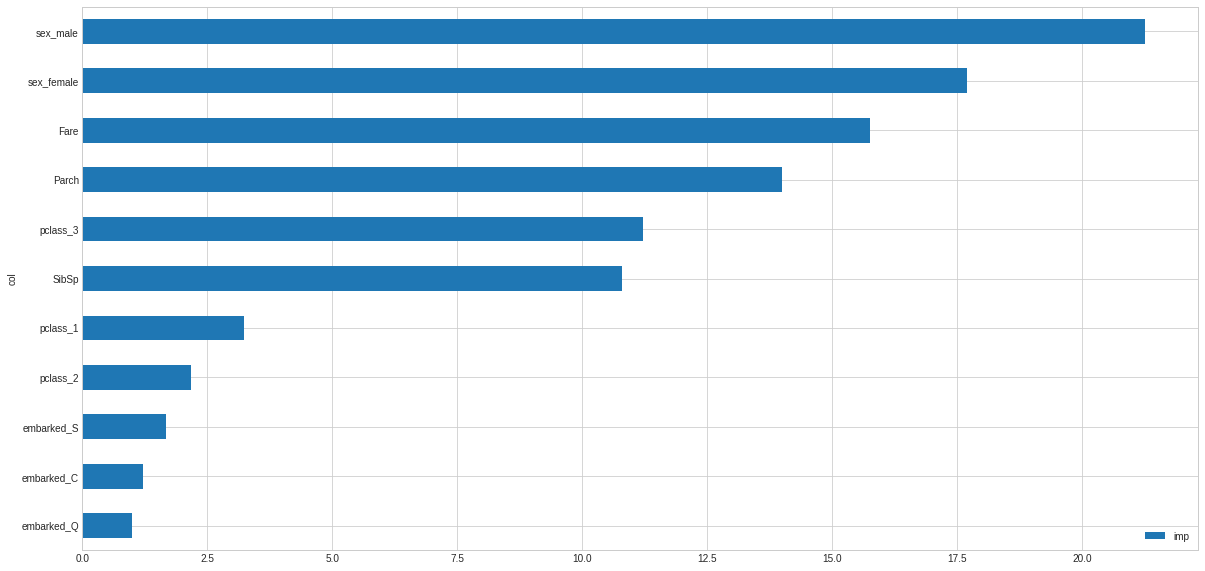

In [108]:
feature_importance(catboostmodel, xtrain)

In [110]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']
evalmetrics = catboostmodel.eval_metrics(train_pool, metrics=metrics, plot=True)
for metric in metrics:
    print(f"{metric} : {np.mean(evalmetrics[metric])}")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision : 0.8286662683284687
Recall : 0.6833382352941176
F1 : 0.7489789466084935
AUC : 0.8842839467480982


In [111]:
xtrain.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [115]:
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [117]:
## one hot encode the columns in test dataframe like xtrain

test_embarked_one_hot = pd.get_dummies(testdf['Embarked'], prefix='embarked')

test_sex_one_hot = pd.get_dummies(testdf['Sex'], prefix='sex')

test_pclass_one_hot = pd.get_dummies(testdf['Pclass'], prefix='pclass')

testdf = pd.concat([testdf, test_embarked_one_hot, test_sex_one_hot, test_pclass_one_hot], axis=1)

testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [118]:
wanted_test_columns = xtrain.columns
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [119]:
## make a prediction using catboostmodel on the wanted_test_columns

predictions = catboostmodel.predict(testdf[wanted_test_columns])

In [120]:
predictions[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [121]:
## submission 

submission = pd.DataFrame()
submission['PassengerId']=testdf['PassengerId']
submission['Survived']=predictions
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [123]:
len(submission)==len(testdf)

True

In [125]:
submission.to_csv('/kaggle/working/catboost_submission.csv', index=False)